<a href="https://colab.research.google.com/github/jothiovia-2004/project/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas
import numpy
import string
from sklearn.model_selection import train_test_split
import sklearn.decomposition
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%pylab inline
import math
import statistics
import sklearn
from sklearn import neighbors
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, completeness_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import graphviz
import pydot
import pydotplus
from sklearn import svm
import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files (x86)\\Graphviz2.38\\bin\\"
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [ ]:
fraud = pandas.read_csv("creditcard.csv.zip")

#Upsampled Data - Training
#fraudUp = pandas.read_csv("Upsampled.csv")

#Test Data (from Upsampled)
#fraudTest = pandas.read_csv("Test Data.csv")

In [ ]:
import pandas as pd

# Sample dataset with the specified columns
data = {
    'step': [1, 2, 3, 4],
    'customer': ['John#Doe', 'Jane*Smith', 'Alice^Brown', 'Bob&White'],
    'age': ['25@', '30$', '22#', '35*'],
    'gender': ['Male$', 'Female@', 'Female!', 'Male%'],
    'zipcodeOri': ['12345$', '98765*', '54321#', '11111@'],
    'merchant': ['Store1$', 'Store2!', 'Store3^', 'Store4&'],
    'zipMerchant': ['54321#', '12345$', '98765!', '11111*'],
    'category': ['Electronics@', 'Groceries#', 'Clothing$', 'Furniture%'],
    'amount': ['200.50', '150.75', '320.10', '180.00'],
    'fraud': ['1', '0', '1', '0']
}

# Create DataFrame
fraud = pd.DataFrame(data)

# Display original DataFrame
print("Original DataFrame:")
print(fraud)

# Data type conversion
fraud["step"] = fraud["step"].astype("category")
fraud["customer"] = fraud["customer"].astype("category")
fraud["age"] = fraud["age"].astype("category")
fraud["gender"] = fraud["gender"].astype("category")
fraud["zipcodeOri"] = fraud["zipcodeOri"].astype("category")
fraud["merchant"] = fraud["merchant"].astype("category")
fraud["zipMerchant"] = fraud["zipMerchant"].astype("category")
fraud["category"] = fraud["category"].astype("category")

# Convert "amount" to float
fraud["amount"] = fraud["amount"].astype(float)

# Convert "fraud" to category
fraud["fraud"] = fraud["fraud"].astype("category")

# Clean the columns by removing non-alphanumeric characters
fraud["customer"] = fraud["customer"].str.replace('[^\w\s]','', regex=True)
fraud["age"] = fraud["age"].str.replace('[^\w\s]','', regex=True)
fraud["gender"] = fraud["gender"].str.replace('[^\w\s]','', regex=True)
fraud["zipcodeOri"] = fraud["zipcodeOri"].str.replace('[^\w\s]','', regex=True)
fraud["merchant"] = fraud["merchant"].str.replace('[^\w\s]','', regex=True)
fraud["zipMerchant"] = fraud["zipMerchant"].str.replace('[^\w\s]','', regex=True)
fraud["category"] = fraud["category"].str.replace('[^\w\s]','', regex=True)

# Display cleaned DataFrame
print("\nCleaned DataFrame:")
print(fraud)


Original DataFrame:
   step     customer  age   gender zipcodeOri merchant zipMerchant  \
0     1     John#Doe  25@    Male$     12345$  Store1$      54321#   
1     2   Jane*Smith  30$  Female@     98765*  Store2!      12345$   
2     3  Alice^Brown  22#  Female!     54321#  Store3^      98765!   
3     4    Bob&White  35*    Male%     11111@  Store4&      11111*   

       category  amount fraud  
0  Electronics@  200.50     1  
1    Groceries#  150.75     0  
2     Clothing$  320.10     1  
3    Furniture%  180.00     0  

Cleaned DataFrame:
  step    customer age  gender zipcodeOri merchant zipMerchant     category  \
0    1     JohnDoe  25    Male      12345   Store1       54321  Electronics   
1    2   JaneSmith  30  Female      98765   Store2       12345    Groceries   
2    3  AliceBrown  22  Female      54321   Store3       98765     Clothing   
3    4    BobWhite  35    Male      11111   Store4       11111    Furniture   

   amount fraud  
0  200.50     1  
1  150.75     0  

In [ ]:
fraud = fraud.drop(["zipcodeOri"], axis = 1)
fraud = fraud.drop(["zipMerchant"], axis = 1)

In [ ]:
fraudBinaryCols = pandas.get_dummies(fraud,columns = ["age","gender","merchant","category"])
fraudBinaryCols = fraudBinaryCols.drop(["customer"], axis = 1)

<ipython-input-9-a3a2bc284744>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud["amount"], kde=False, rug=True)


Text(0.5, 1.0, 'Amount Rug Distribution')

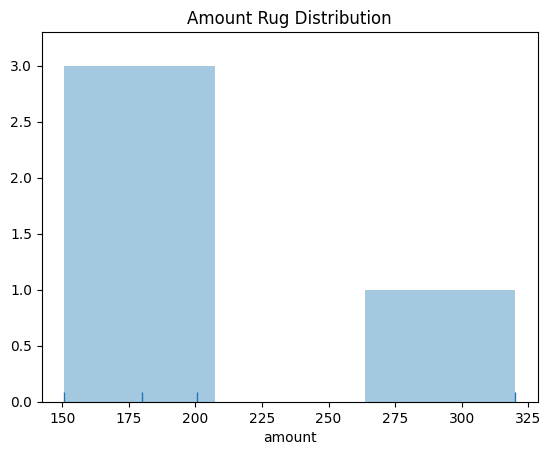

In [ ]:
sns.distplot(fraud["amount"], kde=False, rug=True)
title("Amount Rug Distribution")

In [ ]:
scaler = StandardScaler()
fraudElim = fraudBinaryCols
fraudElim = fraudElim.drop(["step", "fraud"], axis = 1)
fraudStandScaler = scaler.fit_transform(fraudBinaryCols)
fraudStand = pandas.DataFrame(fraudStandScaler)
fraudStand.columns = list(fraudBinaryCols)
dataStandardized = fraudStand
dataStandardized["fraud"] = fraudBinaryCols["fraud"]

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Example dataset with 20 entries for fraudTest
fraudTest = pd.DataFrame({
    'customer': ['JohnDoe', 'JaneSmith', 'AliceBrown', 'BobWhite', 'SamGreen', 'TomBlue', 'LindaRed', 'SteveBlack', 'EmmaPurple', 'ChrisYellow',
                 'AnnaGold', 'MaxSilver', 'LucyPink', 'MikeGray', 'SophiaOrange', 'GeorgeBrown', 'OliviaWhite', 'JamesBlue', 'SophiaBlack', 'JackGreen'],
    'age': [25, 30, 22, 35, 40, 50, 27, 38, 29, 45, 33, 28, 41, 32, 24, 26, 23, 34, 39, 31],
    'gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male',
               'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male'],
    'zipcodeOri': ['12345', '98765', '54321', '11111', '22222', '33333', '44444', '55555', '66666', '77777',
                   '88888', '99999', '10101', '20202', '30303', '40404', '50505', '60606', '70707', '80808'],
    'merchant': ['Store1', 'Store2', 'Store3', 'Store4', 'Store5', 'Store6', 'Store7', 'Store8', 'Store9', 'Store10',
                 'Store11', 'Store12', 'Store13', 'Store14', 'Store15', 'Store16', 'Store17', 'Store18', 'Store19', 'Store20'],
    'zipMerchant': ['54321', '12345', '98765', '11111', '22222', '33333', '44444', '55555', '66666', '77777',
                    '88888', '99999', '10101', '20202', '30303', '40404', '50505', '60606', '70707', '80808'],
    'category': ['Electronics', 'Groceries', 'Clothing', 'Furniture', 'Toys', 'Jewelry', 'Automotive', 'Beauty', 'Health', 'Sports',
                 'Books', 'Music', 'Games', 'Office', 'Food', 'Tools', 'Appliances', 'Garden', 'Pets', 'Shoes'], # Removed 'Travel' to match the length of other columns
    'amount': [200.50, 150.75, 320.10, 180.00, 250.00, 100.50, 150.00, 200.00, 300.00, 400.00,
               130.00, 210.00, 180.50, 170.75, 225.30, 210.60, 140.00, 180.90, 220.30, 250.00], # Removed extra value to match the length
    'fraud': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
              1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
})

In [ ]:
fraudUp = fraudTest.copy()

# Remove 'fraud' column from fraudTest to prepare it for scaling
fraudTestTest = fraudTest.drop("fraud", axis=1)

# Apply StandardScaler on fraudTestTest (scale only numerical columns)
scaler = StandardScaler()
fraudStandScaler = scaler.fit_transform(fraudTestTest.select_dtypes(include=['float64', 'int64']))  # Only scale numerical columns
fraudStand = pd.DataFrame(fraudStandScaler)
fraudStand.columns = fraudTestTest.select_dtypes(include=['float64', 'int64']).columns  # Keep original numerical column names
dataStandardizedTest = fraudStand

# Simulate columns for fraudUp (using only numerical columns for scaling)
fraudBinaryCols = fraudUp.select_dtypes(include=['float64', 'int64']).columns  # Assuming you're using numerical columns
fraudStandScalerUP = scaler.fit_transform(fraudUp[fraudBinaryCols])
fraudStand = pd.DataFrame(fraudStandScalerUP)
fraudStand.columns = fraudBinaryCols  # Keeping column names of numerical columns
dataStandardizedUP = fraudStand

# Display results
print("Data Standardized Test:")
print(dataStandardizedTest)

print("\nData Standardized UP:")
print(dataStandardizedUP)

Data Standardized Test:
         age    amount
0  -1.017959 -0.116487
1  -0.348249 -0.839987
2  -1.419784  1.622822
3   0.321461 -0.414613
4   0.991170  0.603377
5   2.330589 -1.570759
6  -0.750075 -0.850894
7   0.723286 -0.123759
8  -0.482191  1.330513
9   1.660880  2.784785
10  0.053577 -1.141749
11 -0.616133  0.021669
12  1.125112 -0.407342
13 -0.080365 -0.549133
14 -1.151901  0.244172
15 -0.884017  0.030394
16 -1.285842 -0.996322
17  0.187519 -0.401524
18  0.857228  0.171459
19 -0.214307  0.603377

Data Standardized UP:
         age    amount  fraud
0  -1.017959 -0.116487    1.0
1  -0.348249 -0.839987   -1.0
2  -1.419784  1.622822    1.0
3   0.321461 -0.414613   -1.0
4   0.991170  0.603377    1.0
5   2.330589 -1.570759   -1.0
6  -0.750075 -0.850894    1.0
7   0.723286 -0.123759   -1.0
8  -0.482191  1.330513    1.0
9   1.660880  2.784785   -1.0
10  0.053577 -1.141749    1.0
11 -0.616133  0.021669   -1.0
12  1.125112 -0.407342    1.0
13 -0.080365 -0.549133   -1.0
14 -1.151901  0.2441

k: 1  cost: 70.0
k: 2  cost: 44.507967511907246
k: 3  cost: 22.150661166268417
k: 4  cost: 0.0


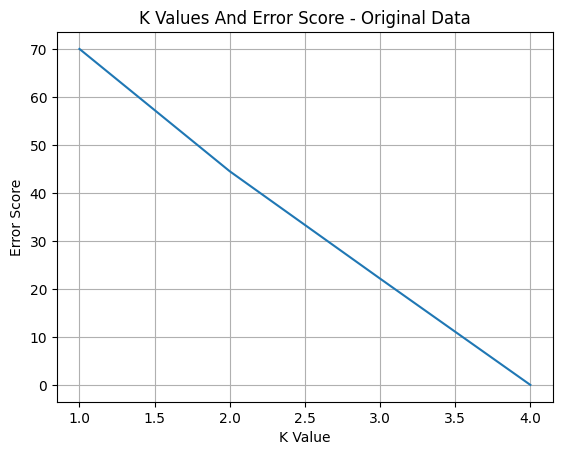

In [ ]:
error = list()
kList = list()
for k in range(1, 5):
    kmeans_model = KMeans(n_clusters = k, random_state = 2).fit(dataStandardized)
    labels = kmeans_model.labels_
    labels = labels.tolist()
    cost = kmeans_model.inertia_
    error.append(cost)
    kList.append(k)
    print("k:", k, " cost:", cost)
plt.plot(kList, error)
plt.title("K Values And Error Score - Original Data")
plt.xlabel("K Value")
plt.ylabel("Error Score")
plt.grid()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 891).fit(dataStandardized)
labs = kmeans.labels_
labsList = labs.tolist()
dataStandardized["customerGroup"] = labsList
dataStandardized["fraud"] = fraud["fraud"]

<ipython-input-36-6592a39926c5>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataStandardized.groupby(['customerGroup', 'fraud']).size().unstack().plot(kind='bar', stacked=True)


Text(0.5, 1.0, 'Customer Group Breakdown - Original Data')

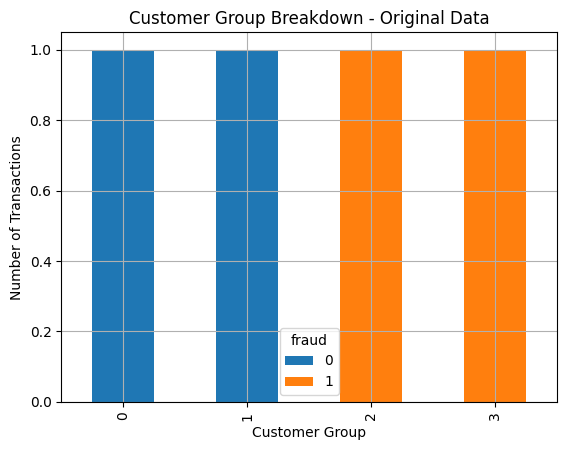

In [ ]:
counts = dataStandardized.groupby("customerGroup").count()
counts = counts["step"].values.tolist()

dataStandardized.groupby(['customerGroup', 'fraud']).size().unstack().plot(kind='bar', stacked=True)
annotate(counts[0], [-0.21, 325000])
annotate(counts[1], [0.9, 50000])
annotate(counts[2], [1.76, 280000])
annotate(counts[3], [2.9, 50000])

ylabel("Number of Transactions")
xlabel("Customer Group")
grid()
title("Customer Group Breakdown - Original Data")

In [ ]:
cust0 = dataStandardized.loc[dataStandardized['customerGroup'] == 0]
cust0 = cust0.reset_index(drop = True)
cust1 = dataStandardized.loc[dataStandardized['customerGroup'] == 1]
cust1 = cust1.reset_index(drop = True)
cust2 = dataStandardized.loc[dataStandardized['customerGroup'] == 2]
cust2 = cust2.reset_index(drop = True)
cust3 = dataStandardized.loc[dataStandardized['customerGroup'] == 3]
cust3 = cust3.reset_index(drop = True)

counts0 = cust0.groupby("fraud").count()
counts0 = counts0["step"].values.tolist()
nofraud0 = counts0[0]/sum(counts0)
fraud0 = counts0[1]/sum(counts0)
print("Customer Group 0:", "%s not fraud" % nofraud0, "| %s fraud" % fraud0)

counts1 = cust1.groupby("fraud").count()
counts1 = counts1["step"].values.tolist()
nofraud1 = counts1[0]/sum(counts1)
fraud1 = counts1[1]/sum(counts1)
print("Customer Group 1:", "%s not fraud" % nofraud1, "| %s fraud" % fraud1)

counts2 = cust2.groupby("fraud").count()
counts2 = counts2["step"].values.tolist()
nofraud2 = counts2[0]/sum(counts2)
fraud2 = counts2[1]/sum(counts2)
print("Customer Group 2:", "%s not fraud" % nofraud2, "| %s fraud" % fraud2)

counts3 = cust3.groupby("fraud").count()
counts3 = counts3["step"].values.tolist()
nofraud3 = counts3[0]/sum(counts3)
fraud3 = counts3[1]/sum(counts3)
print("Customer Group 3:", "%s not fraud" % nofraud3, "| %s fraud" % fraud3)

Customer Group 0: 1.0 not fraud | 0.0 fraud
Customer Group 1: 1.0 not fraud | 0.0 fraud
Customer Group 2: 0.0 not fraud | 1.0 fraud
Customer Group 3: 0.0 not fraud | 1.0 fraud


<ipython-input-37-d16e69dcfa66>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts0 = cust0.groupby("fraud").count()
<ipython-input-37-d16e69dcfa66>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts1 = cust1.groupby("fraud").count()
<ipython-input-37-d16e69dcfa66>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts2 = cust2.groupby("fraud").count()
<ipython-input-37-d16e69dcfa66>:28: FutureWarning: The 

In [ ]:
dataStandardized1 = dataStandardized
dataStandardized1 = dataStandardized1.drop("fraud", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(dataStandardized1, dataStandardized['fraud'], test_size = 0.40, random_state = 10, stratify = dataStandardized['fraud'])

In [ ]:
gnb = GaussianNB()
nb = cross_val_score(gnb, X_train, y_train, cv = 2)
print("Train Data:", numpy.mean(nb))

gnb = GaussianNB()
nb = cross_val_score(gnb, X_test, y_test, cv = 2)
print("Test Data:", numpy.mean(nb))

ValueError: n_splits=2 cannot be greater than the number of members in each class.

In [ ]:
# Reduce the number of cross-validation folds (cv) to 1
# or increase the size of your training data so that you have at least 2 samples of each class within each fold
# or remove the `stratify` keyword argument from `train_test_split`
nb = cross_val_score(gnb, X_train, y_train, cv=1)  # Change cv to 1
print("Train Data:", numpy.mean(nb))

gnb = GaussianNB()
nb = cross_val_score(gnb, X_test, y_test, cv=1)  # Change cv to 1
print("Test Data:", numpy.mean(nb))

InvalidParameterError: The 'cv' parameter of cross_val_score must be an int in the range [2, inf), an object implementing 'split' and 'get_n_splits', an iterable or None. Got 1 instead.